In [11]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
sns.set() # set the default Seaborn style for graphics

In [9]:
%pip install numpy pandas seaborn matplotlib

  Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.2.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 812.8 kB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.5-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl (14.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 2.4 MB/s eta 0:00:0000:0100:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 3.0 MB/s eta 0:00:0000:0100:01
Using cached contourpy-1.2.1-cp310-cp3

#  Exploratory Data Analysis

In [13]:
file = '/Users/tangminhanh/Downloads/artemis_ai/Ticket_classification/data/AI Auto Ticket Categorization (Original)(Reference).csv'
df = pd.read_csv(file, encoding='ISO-8859-1', skipinitialspace = True)
df.head()

,Department,Tech Group,Sub-Category,Priority,Description,assistant (For Getlogs only)
0,Technology Services,Access Control and Security,Access Reactivation,P3 - Planned,Request to reactivate a users biometric access.,NaN
1,Technology Services,Access Control and Security,Access Upload,P3 - Planned,Request to upload an access to another biometr...,NaN
2,Technology Services,Access Control and Security,Badge Card Re-assignment,P3 - Planned,Request to re-assign a badge card to a differe...,NaN
3,Technology Services,Access Control and Security,Badge Card Request,P3 - Planned,Request for badge card (ITS is already present...,NaN
4,Technology Services,Access Control and Security,Bio Disable,P3 - Planned,Request to disable a biometric access.,NaN


In [14]:
print(df.describe())

       assistant (For Getlogs only)
count                           0.0
mean                            NaN
std                             NaN
min                             NaN
25%                             NaN
50%                             NaN
75%                             NaN
max                             NaN


## Text Description Analysis

In [15]:
# Check the length of descriptions
df['description_length'] = df['Description'].apply(len)
df['word_count'] = df['Description'].apply(lambda x: len(x.split()))

# Describe statistics of text length and count
print(df['description_length'].describe())
print(df['word_count'].describe())

count    931.000000
mean      76.004296
std       39.776526
min       24.000000
25%       50.000000
50%       66.000000
75%       90.000000
max      406.000000
Name: description_length, dtype: float64
count    931.000000
mean      11.308271
std        5.697436
min        3.000000
25%        8.000000
50%       10.000000
75%       13.000000
max       59.000000
Name: word_count, dtype: float64


### Word Frequency Analysis

In [16]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Function to clean text
stop = set(stopwords.words("english"))
def clean(text):
            text = text.lower()
            obj = re.compile(r"<.*?>")
            text = obj.sub(r" ", text)
            obj = re.compile(r"https://\S+|http://\S+")
            text = obj.sub(r" ", text)
            obj = re.compile(r"[^\w\s]")
            text = obj.sub(r" ", text)
            obj = re.compile(r"\d{1,}")
            text = obj.sub(r" ", text)
            obj = re.compile(r"_+")
            text = obj.sub(r" ", text)
            obj = re.compile(r"\s\w\s")
            text = obj.sub(r" ", text)
            obj = re.compile(r"\s{2,}")
            text = obj.sub(r" ", text)

            stemmer = SnowballStemmer("english")
            text = [stemmer.stem(word)
                    for word in text.split() if word not in stop]

            porter_stemmer = PorterStemmer()
            text = [porter_stemmer.stem(word) for word in text]
            wordnet_lemmatizer = WordNetLemmatizer()
            lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
            return " ".join(text)

ModuleNotFoundError: No module named 'nltk'

In [30]:
# Clean descriptions
df['cleaned_description'] = df['Description'].apply(clean)

# Combine all descriptions into one
all_text = ' '.join(df['cleaned_description'])

# Get word frequencies
word_counts = Counter(all_text.split())
print(word_counts.most_common(20))

[('ticket', 581), ('relat', 406), ('request', 355), ('process', 117), ('updat', 95), ('creat', 78), ('inquiri', 72), ('task', 72), ('employ', 65), ('asset', 62), ('issu', 60), ('client', 58), ('plan', 51), ('new', 49), ('system', 49), ('concern', 46), ('network', 45), ('requir', 42), ('secur', 40), ('categori', 38)]


### Word Count

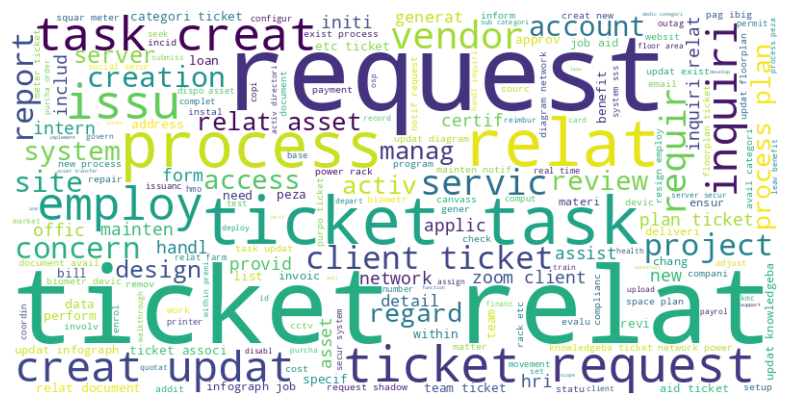

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Distribution of Labels

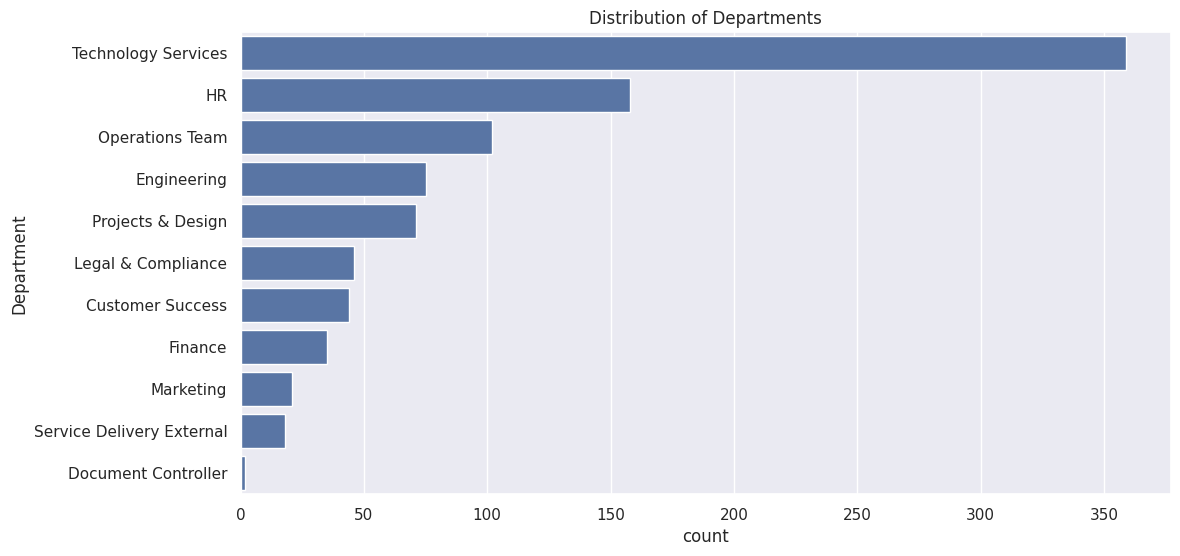

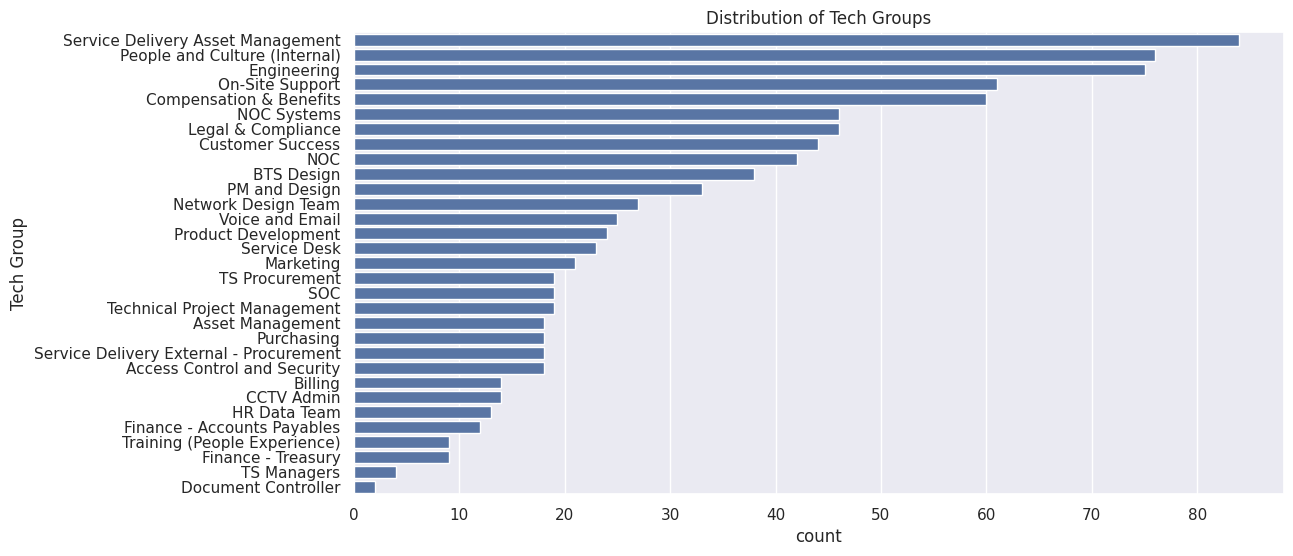

In [32]:
# Distribution of departments
plt.figure(figsize=(12, 6))
sns.countplot(y='Department', data=df, order=df['Department'].value_counts().index)
plt.title('Distribution of Departments')
plt.show()

# Distribution of tech groups
plt.figure(figsize=(12, 6))
sns.countplot(y='Tech Group', data=df, order=df['Tech Group'].value_counts().index)
plt.title('Distribution of Tech Groups')
plt.show()

In [ ]:
# replace NaN to empty string
df=df.replace(np.nan,"")

#### Department

In [7]:
def list_tech_group(df, specific_department):
    # Filter the DataFrame for the specific category
    filtered_df = df[df['Department'] == specific_department]
    tech_groups = filtered_df['Tech Group'].tolist()
    return tech_groups

def plot_tech_group(tech_groups, department_name):
    # Count the occurrences of each sub-category
    tech_group_counts = {tech_group: tech_groups.count(tech_group) for tech_group in set(tech_groups)}

    # Plotting the sub-categories
    plt.figure(figsize=(10, 6))
    plt.bar(tech_group_counts.keys(), tech_group_counts.values(), color='skyblue')
    plt.xlabel('Tech Group')
    plt.ylabel('Counts')
    plt.title(f'Tech Group under "{department_name}"')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [16]:
def list_tech_group(df, specific_department):
    # Filter the DataFrame for the specific department
    filtered_df = df[df['Department'] == specific_department]
    tech_groups = filtered_df['Tech Group'].tolist()
    return tech_groups

def plot_tech_group(tech_groups, department_name):
    # Count the occurrences of each tech group
    tech_group_counts = {tech_group: tech_groups.count(tech_group) for tech_group in set(tech_groups)}

    # Plotting the tech groups
    plt.figure(figsize=(10, 6))
    plt.bar(tech_group_counts.keys(), tech_group_counts.values(), color='skyblue')
    plt.xlabel('')
    plt.ylabel('Counts')
    plt.title(f'Tech Group under "{department_name}"')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

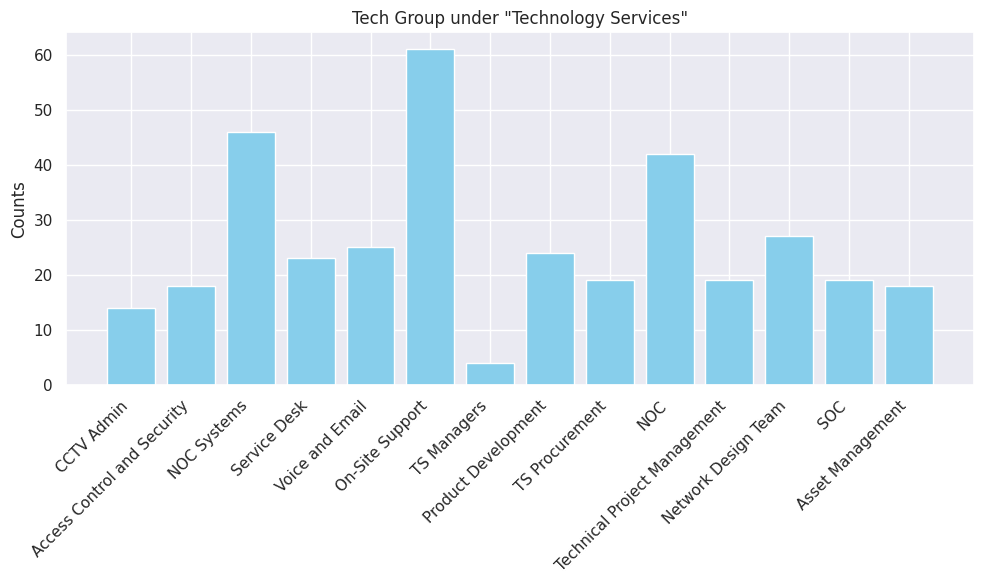

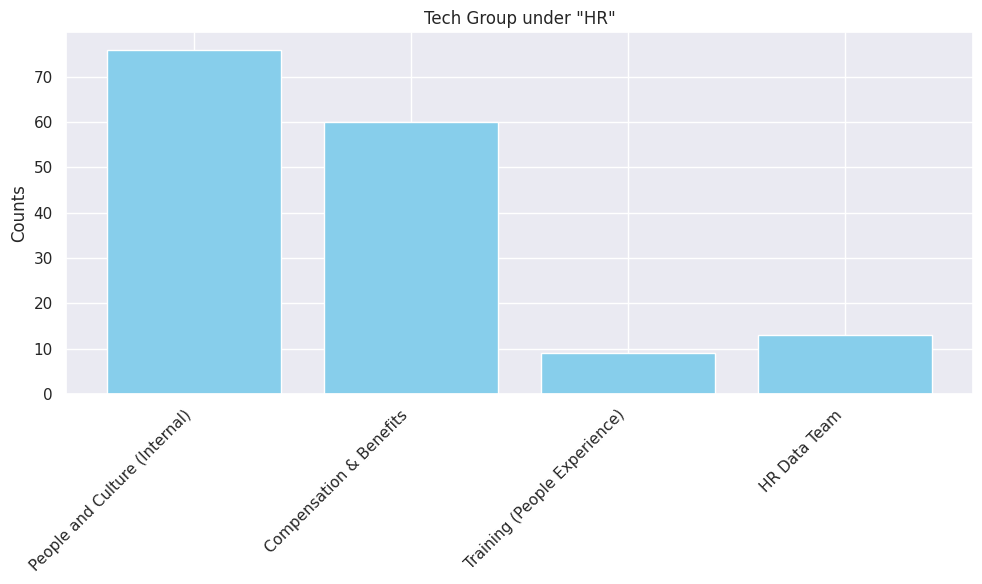

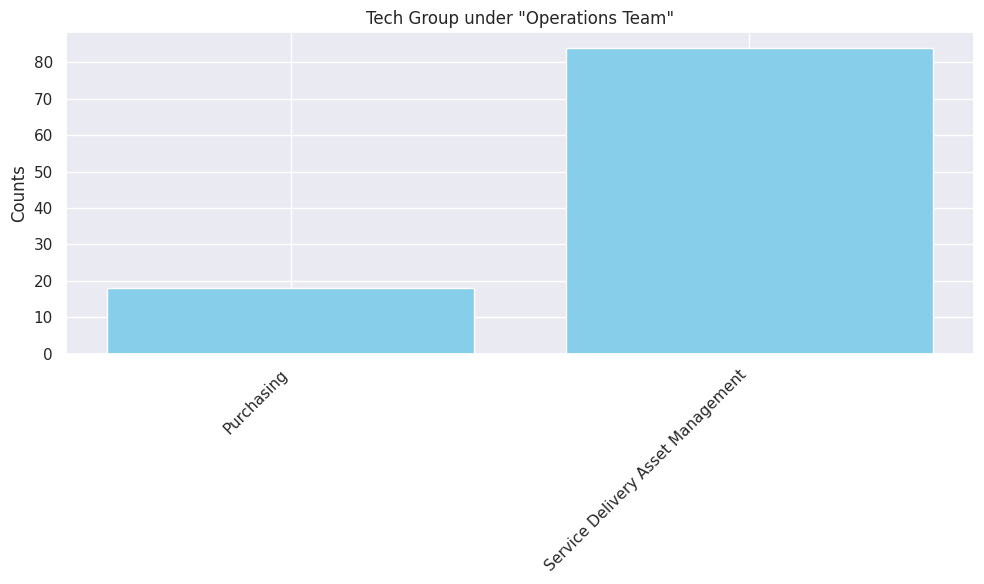

In [17]:
# Specify the departments to search for
specific_departments = ['Technology Services', 'HR', 'Operations Team']  # Change this to the departments you want to plot

# Iterate over each department and plot the tech groups
for department in specific_departments:
    tech_groups_list = list_tech_group(df, department)
    plot_tech_group(tech_groups_list, department)

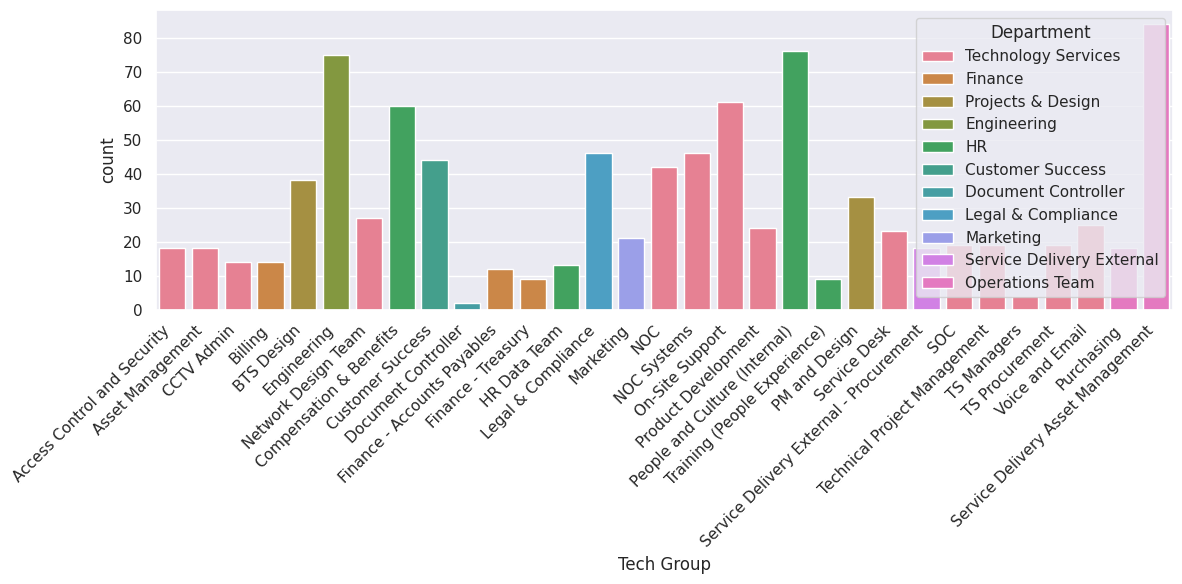

In [21]:
# Distribution of tech groups within each department
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Tech Group', hue='Department')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Transform descriptions into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_description'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display TF-IDF features
print(tfidf_df.head())


   absenc   ac  accent    access  accessor  accessori  accid  account  \
0     0.0  0.0     0.0  0.385477       0.0        0.0    0.0      0.0   
1     0.0  0.0     0.0  0.359025       0.0        0.0    0.0      0.0   
2     0.0  0.0     0.0  0.000000       0.0        0.0    0.0      0.0   
3     0.0  0.0     0.0  0.000000       0.0        0.0    0.0      0.0   
4     0.0  0.0     0.0  0.499656       0.0        0.0    0.0      0.0   

   accredit  accur  ...  withdraw  within  without  women  work  workstat  \
0       0.0    0.0  ...       0.0     0.0      0.0    0.0   0.0       0.0   
1       0.0    0.0  ...       0.0     0.0      0.0    0.0   0.0       0.0   
2       0.0    0.0  ...       0.0     0.0      0.0    0.0   0.0       0.0   
3       0.0    0.0  ...       0.0     0.0      0.0    0.0   0.0       0.0   
4       0.0    0.0  ...       0.0     0.0      0.0    0.0   0.0       0.0   

   written  yet  zone  zoom  
0      0.0  0.0   0.0   0.0  
1      0.0  0.0   0.0   0.0  
2      0

In [36]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.3 MB/s eta 0:00:00


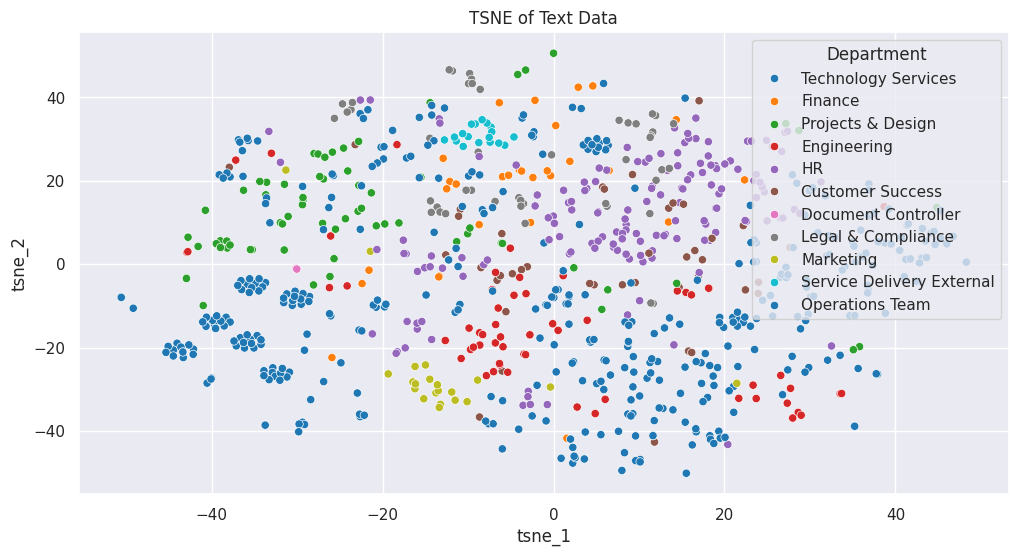

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


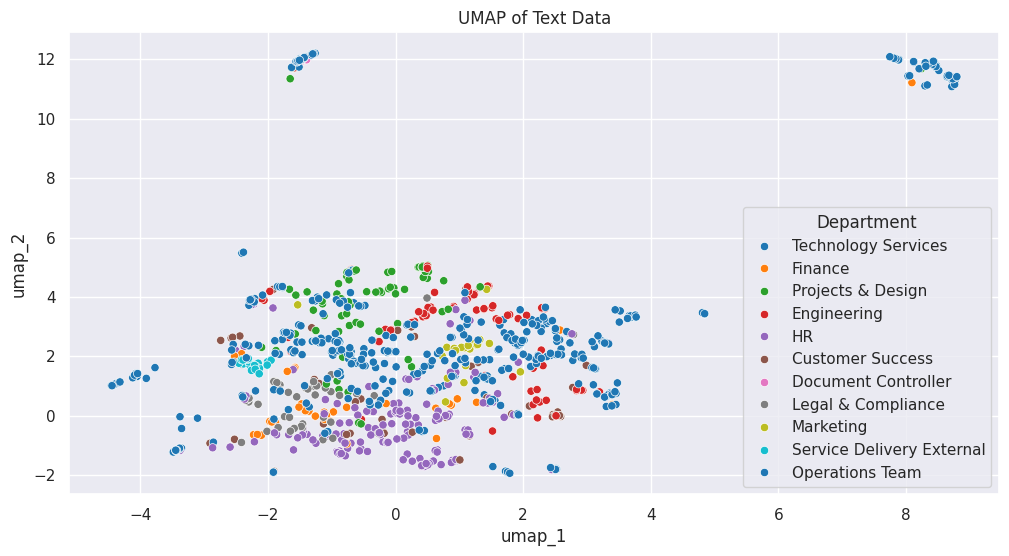

In [38]:
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Use TF-IDF features for dimensionality reduction with TSNE
tsne = TSNE(n_components=2, random_state=42, init='random')
tsne_results = tsne.fit_transform(tfidf_features.toarray())

# Add TSNE results to DataFrame
df['tsne_1'] = tsne_results[:, 0]
df['tsne_2'] = tsne_results[:, 1]

# Plot TSNE results
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='Department', data=df, palette='tab10')
plt.title('TSNE of Text Data')
plt.show()

# Using UMAP for dimensionality reduction
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_results = umap_model.fit_transform(tfidf_features.toarray())

# Add UMAP results to DataFrame
df['umap_1'] = umap_results[:, 0]
df['umap_2'] = umap_results[:, 1]

# Plot UMAP results
plt.figure(figsize=(12, 6))
sns.scatterplot(x='umap_1', y='umap_2', hue='Department', data=df, palette='tab10')
plt.title('UMAP of Text Data')
plt.show()
